In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
housing = pd.read_csv("/content/housing.csv", low_memory = False)

In [ ]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housing.shape

(4600, 18)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [ ]:
set(housing)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [ ]:
housing.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,40
sqft_lot,14
floors,0
waterfront,0
view,0
condition,0


In [ ]:
housing = housing.drop('country',axis = 1)

In [ ]:
housing = housing.drop('statezip',axis = 1)

In [ ]:
housing.apply(lambda x : x.unique())

,0
date,"[02/05/2014 0:00, 03/05/2014 0:00, 04/05/2014 ..."
price,"[313000.0, 2384000.0, 342000.0, 420000.0, 5500..."
bedrooms,"[3, 5, 4, 2, 6, 7, 9, 1, 8, 0]"
bathrooms,"[1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3...."
sqft_living,"[1340.0, 3650.0, 1930.0, 2000.0, 1940.0, 880.0..."
sqft_lot,"[nan, 9480.0, 9720.0, 6700.0, 7231.0, 15878.0,..."
floors,"[1.5, 2.0, 1.0, 2.5, 3.0, 3.5]"
waterfront,"[0, 1]"
view,"[0, 4, 1, 2, 3]"
condition,"[3, 5, 4, 2, 1]"


In [ ]:
set(housing)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [ ]:
null_values = ['sqft_lot','sqft_living']

In [ ]:
for column in null_values:
    housing = housing[~housing[column].isnull()]

In [ ]:
housing.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
housing['yr_built'].value_counts()

,count
yr_built,
2006.0,109
2005.0,104
2007.0,92
2004.0,91
2003.0,89
...,...
1915.0,6
1935.0,6
1933.0,5


In [ ]:
null = ['city']

In [ ]:
for column in null:
    housing = housing[~housing[column].isnull()]

In [ ]:
housing.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
housing['yr_built'] = housing['yr_built'].fillna('0')

In [ ]:
housing.isnull().sum().sum()

np.int64(0)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4533 entries, 67 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4533 non-null   object 
 1   price          4533 non-null   float64
 2   bedrooms       4533 non-null   int64  
 3   bathrooms      4533 non-null   float64
 4   sqft_living    4533 non-null   float64
 5   sqft_lot       4533 non-null   float64
 6   floors         4533 non-null   float64
 7   waterfront     4533 non-null   int64  
 8   view           4533 non-null   int64  
 9   condition      4533 non-null   int64  
 10  sqft_above     4533 non-null   int64  
 11  sqft_basement  4533 non-null   int64  
 12  yr_built       4533 non-null   object 
 13  yr_renovated   4533 non-null   int64  
 14  street         4533 non-null   object 
 15  city           4533 non-null   object 
dtypes: float64(5), int64(7), object(4)
memory usage: 602.0+ KB


In [ ]:
roundoff = housing.select_dtypes(include=['float'])

In [ ]:
for column in roundoff:
    housing[column] = housing[column].round(2)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4533 entries, 67 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4533 non-null   object 
 1   price          4533 non-null   float64
 2   bedrooms       4533 non-null   int64  
 3   bathrooms      4533 non-null   float64
 4   sqft_living    4533 non-null   float64
 5   sqft_lot       4533 non-null   float64
 6   floors         4533 non-null   float64
 7   waterfront     4533 non-null   int64  
 8   view           4533 non-null   int64  
 9   condition      4533 non-null   int64  
 10  sqft_above     4533 non-null   int64  
 11  sqft_basement  4533 non-null   int64  
 12  yr_built       4533 non-null   object 
 13  yr_renovated   4533 non-null   int64  
 14  street         4533 non-null   object 
 15  city           4533 non-null   object 
dtypes: float64(5), int64(7), object(4)
memory usage: 602.0+ KB


In [ ]:
housing.apply(lambda x : x.unique())

,0
date,"[03/05/2014 0:00, 04/05/2014 0:00, 05/05/2014 ..."
price,"[310000.0, 775000.0, 365000.0, 331950.0, 78350..."
bedrooms,"[3, 2, 4, 5, 6, 7, 9, 1, 8, 0]"
bathrooms,"[1.0, 2.5, 2.0, 3.0, 2.25, 1.75, 1.5, 2.75, 3...."
sqft_living,"[1010.0, 2680.0, 2200.0, 2530.0, 2850.0, 2280...."
sqft_lot,"[9945.0, 7392.0, 7350.0, 9933.0, 7130.0, 6010...."
floors,"[1.0, 2.0, 2.5, 1.5, 3.0, 3.5]"
waterfront,"[0, 1]"
view,"[0, 2, 1, 3, 4]"
condition,"[4, 3, 5, 2, 1]"


In [ ]:
housing_df = housing[['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'condition', 'yr_renovated', ]]

In [ ]:
housing_df.shape

(4533, 8)

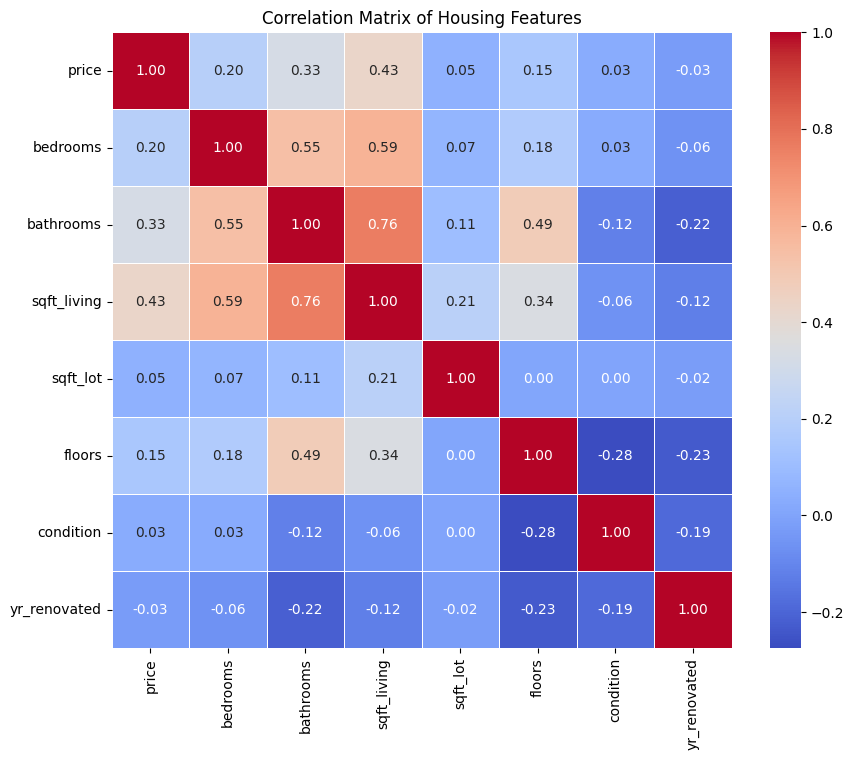

In [ ]:
correlation_data = housing_df.copy()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro

features_to_test = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'yr_renovated']
sample_size = 4000

for feature in features_to_test:
    data = housing[feature].dropna()

    if len(data) > sample_size:
        sampled_data = data.sample(n=sample_size, random_state=0)
    else:
        sampled_data = data

    if len(sampled_data) >= 3:
        stat, p = shapiro(sampled_data)
        print(f"Shapiro-Wilk Test for '{feature}' (sampled {len(sampled_data)} points with random_state=0):")
        print(f"  Statistic (W): {stat:.3f}")
        print(f"  P-value: {p:.3f}")
        alpha = 0.05
        if p > alpha:
            print(f"  The distribution looks normal (fail to reject H0)\n")
        else:
            print(f"  The distribution does not look normal (reject H0)\n")


Shapiro-Wilk Test for 'price' (sampled 4000 points with random_state=0):
  Statistic (W): 0.612
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'bedrooms' (sampled 4000 points with random_state=0):
  Statistic (W): 0.885
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'bathrooms' (sampled 4000 points with random_state=0):
  Statistic (W): 0.934
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'sqft_living' (sampled 4000 points with random_state=0):
  Statistic (W): 0.900
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'sqft_lot' (sampled 4000 points with random_state=0):
  Statistic (W): 0.274
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'floors' (sampled 4000 points with random_state=0):
  Statistic (W): 0.759
  P-value: 0.000
  The distribution does not look normal 

<Axes: >

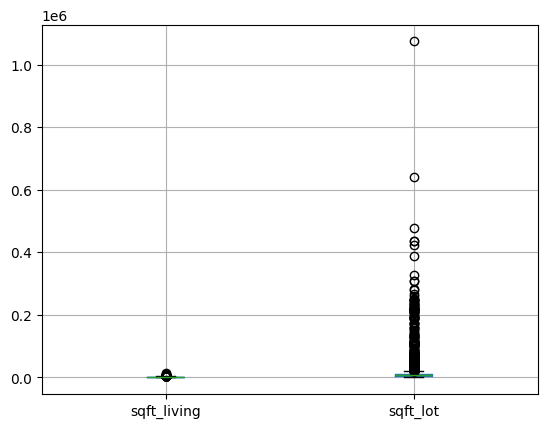

In [ ]:
housing_df.boxplot(column = ['sqft_living', 'sqft_lot'])

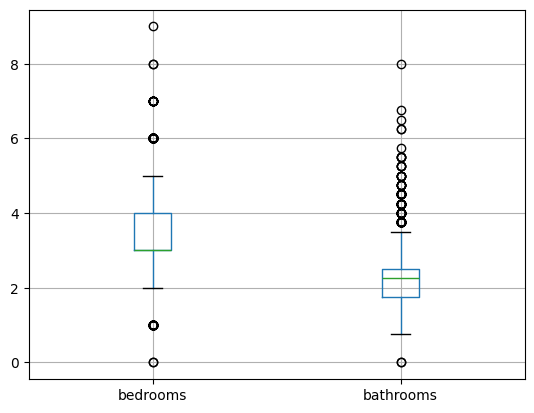

In [ ]:
housing_df.boxplot(column = ['bedrooms', 'bathrooms'])
plt.show()

In [ ]:
housing_df['bathrooms'].describe()

,bathrooms
count,4533.000000
mean,2.161372
std,0.786243
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


In [ ]:
print("At 80%, annual income =",housing_df['bathrooms'].quantile(0.80))
print("At 90%, annual income =",housing_df['bathrooms'].quantile(0.90))
print("At 95%, annual income =",housing_df['bathrooms'].quantile(0.95))
print("At 99%, annual income =",housing_df['bathrooms'].quantile(0.99))
print("At 100%, annual income =",housing_df['bathrooms'].quantile(1.00))


At 80%, annual income = 2.5
At 90%, annual income = 3.0
At 95%, annual income = 3.5
At 99%, annual income = 4.5
At 100%, annual income = 8.0


In [ ]:
housing_df = housing_df[~(housing_df['bathrooms']>5)]

In [ ]:
housing_df['bathrooms'].describe()

,bathrooms
count,4519.000000
mean,2.149812
std,0.758302
min,0.000000
25%,1.750000
50%,2.250000
75%,2.500000
max,5.000000


In [ ]:
housing_df['sqft_lot'].describe()


,sqft_lot
count,4.519000e+03
mean,1.473658e+04
std,3.579868e+04
min,6.380000e+02
25%,5.000000e+03
50%,7.673000e+03
75%,1.093700e+04
max,1.074218e+06


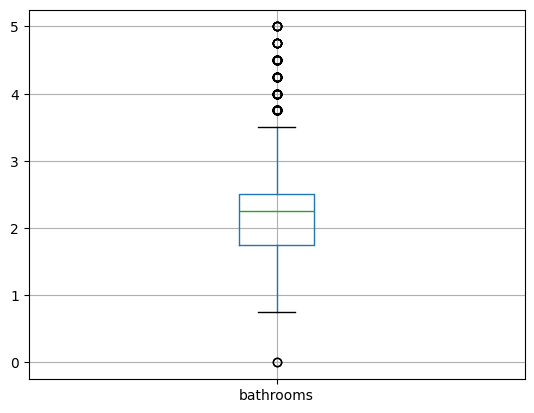

In [ ]:
housing_df.boxplot(column = ['bathrooms'])
plt.show()

In [ ]:
print("At 80%, annual income =",housing_df['sqft_lot'].quantile(0.80))
print("At 90%, annual income =",housing_df['sqft_lot'].quantile(0.90))
print("At 95%, annual income =",housing_df['sqft_lot'].quantile(0.95))
print("At 99%, annual income =",housing_df['sqft_lot'].quantile(0.99))
print("At 100%, annual income =",housing_df['sqft_lot'].quantile(1.00))


At 80%, annual income = 12634.800000000003
At 90%, annual income = 23795.800000000007
At 95%, annual income = 43403.39999999991
At 99%, annual income = 202327.17999999822
At 100%, annual income = 1074218.0


In [ ]:
housing_df = housing_df[~(housing_df['sqft_lot']>203883)]

In [ ]:
housing_df['sqft_lot'].describe()

,sqft_lot
count,4474.000000
mean,12014.049397
std,18177.823090
min,638.000000
25%,5000.000000
50%,7620.000000
75%,10796.500000
max,203425.000000


<Axes: >

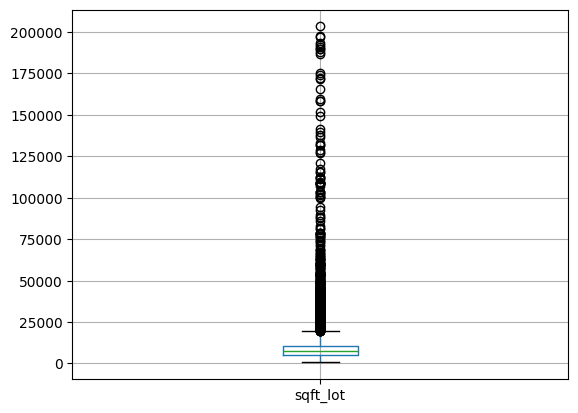

In [ ]:
housing_df.boxplot(column = ['sqft_lot'])

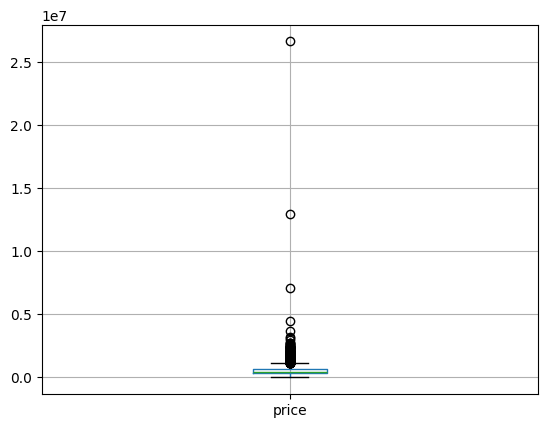

In [ ]:
housing_df.boxplot(column = ['price'])
plt.show()

In [ ]:
print("At 80%, annual income =",housing_df['price'].quantile(0.80))
print("At 90%, annual income =",housing_df['price'].quantile(0.90))
print("At 95%, annual income =",housing_df['price'].quantile(0.95))
print("At 99%, annual income =",housing_df['price'].quantile(0.99))
print("At 100%, annual income =",housing_df['price'].quantile(1.00))

At 80%, annual income = 715000.0
At 90%, annual income = 898700.0000000002
At 95%, annual income = 1158309.9999999986
At 99%, annual income = 1931749.9999999881
At 100%, annual income = 26590000.0


In [ ]:
housing_df = housing_df[~(housing_df['price']>1940000)]

In [ ]:
housing_df['price'].describe()

,price
count,4.429000e+03
mean,5.191895e+05
std,2.887996e+05
min,0.000000e+00
25%,3.200000e+05
50%,4.556000e+05
75%,6.453250e+05
max,1.925000e+06


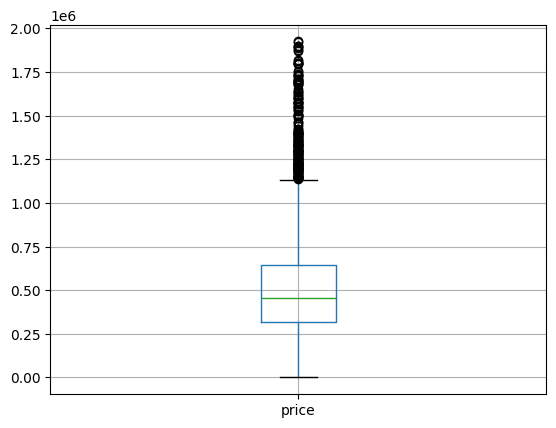

In [ ]:
housing_df.boxplot(column = ['price'])
plt.show()

In [ ]:
housing_df.shape

(4429, 8)

In [ ]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_renovated
count,4.429000e+03,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000,4429.000000
mean,5.191895e+05,3.382253,2.132705,2092.892752,11994.240686,1.507564,3.451569,811.016256
std,2.887996e+05,0.892841,0.741512,869.816113,18252.572630,0.538805,0.675895,979.887501
min,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,1.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1450.000000,5000.000000,1.000000,3.000000,0.000000
50%,4.556000e+05,3.000000,2.250000,1960.000000,7568.000000,1.500000,3.000000,0.000000
75%,6.453250e+05,4.000000,2.500000,2580.000000,10723.000000,2.000000,4.000000,1999.000000
max,1.925000e+06,9.000000,5.000000,6640.000000,203425.000000,3.500000,5.000000,2014.000000


In [ ]:
def calculate_price_per_sqft(housing_df):
    housing_df['price_per_sqft'] = housing_df['price'] / housing_df['sqft_living']
    return housing_df

housing_df = calculate_price_per_sqft(housing_df)

In [ ]:
features_to_test = housing_df.columns

for feature in features_to_test:
    data = housing_df[feature].dropna()

    if len(data) > sample_size:
        sampled_data = data.sample(n=sample_size, random_state=0)
    else:
        sampled_data = data

    if len(sampled_data) >= 3:
        stat, p = shapiro(sampled_data)
        print(f"Shapiro-Wilk Test for '{feature}' (sampled {len(sampled_data)} points with random_state=0):")
        print(f"  Statistic (W): {stat:.3f}")
        print(f"  P-value: {p:.3f}")
        alpha = 0.05
        if p > alpha:
            print(f"  The distribution looks normal (fail to reject H0)\n")
        else:
            print(f"  The distribution does not look normal (reject H0)\n")

Shapiro-Wilk Test for 'price' (sampled 4000 points with random_state=0):
  Statistic (W): 0.890
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'bedrooms' (sampled 4000 points with random_state=0):
  Statistic (W): 0.884
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'bathrooms' (sampled 4000 points with random_state=0):
  Statistic (W): 0.948
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'sqft_living' (sampled 4000 points with random_state=0):
  Statistic (W): 0.950
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'sqft_lot' (sampled 4000 points with random_state=0):
  Statistic (W): 0.445
  P-value: 0.000
  The distribution does not look normal (reject H0)

Shapiro-Wilk Test for 'floors' (sampled 4000 points with random_state=0):
  Statistic (W): 0.758
  P-value: 0.000
  The distribution does not look normal 

<ipython-input-133-cf7efc825a28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_df['sqft_lot'], bins =bins_sqft)


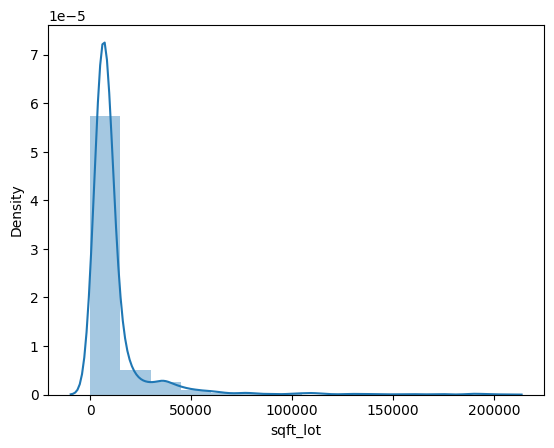

<Figure size 1000x7500 with 0 Axes>

In [ ]:
bins_sqft = np.arange(0, 105001, 15000)
sns.distplot(housing_df['sqft_lot'], bins =bins_sqft)
plt.figure(figsize=(10,75))
plt.show()

<ipython-input-134-18be8272a46a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_df['sqft_living'])


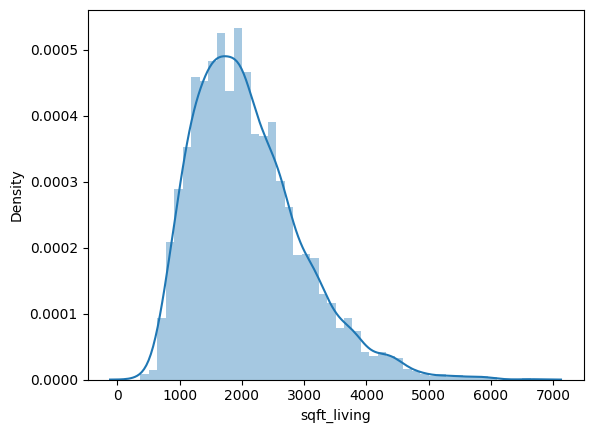

In [ ]:
sns.distplot(housing_df['sqft_living'])
plt.show()

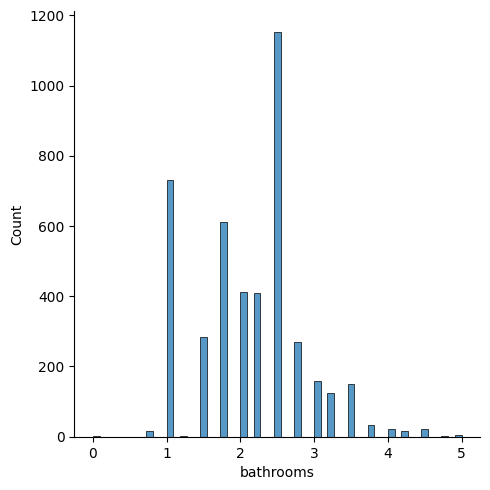

In [ ]:
sns.displot(housing_df['bathrooms'])
plt.show()

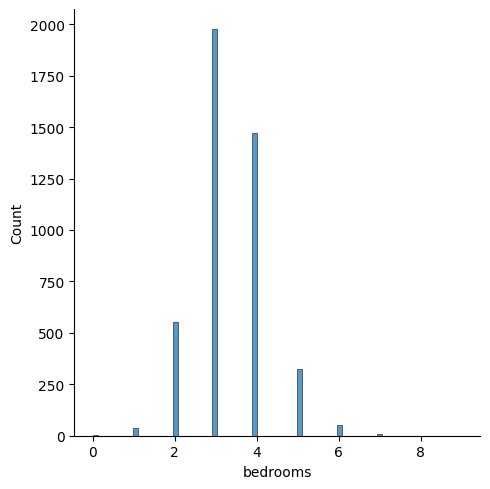

In [ ]:
sns.displot(housing_df['bedrooms'])
plt.show()

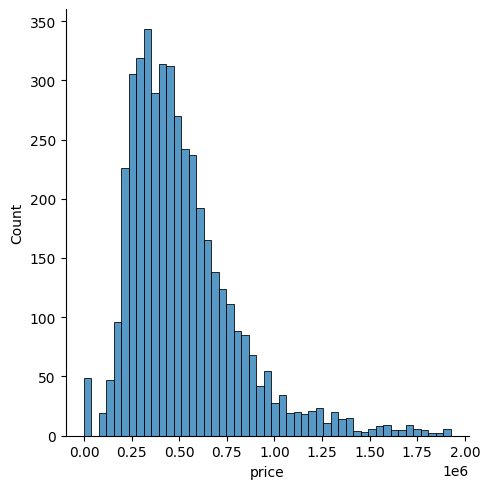

In [ ]:
sns.displot(housing_df['price'])
plt.show()

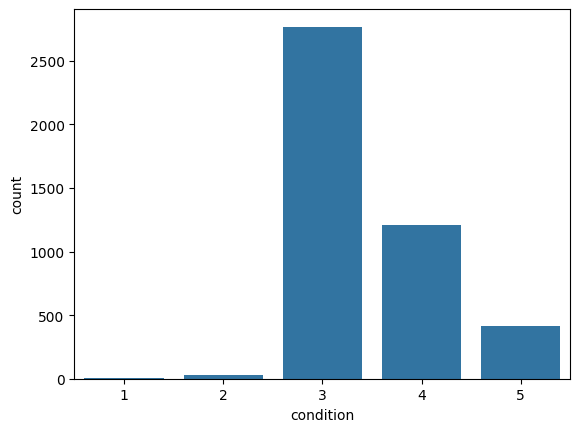

In [145]:
sns.countplot(x = housing_df['condition'])
plt.show()

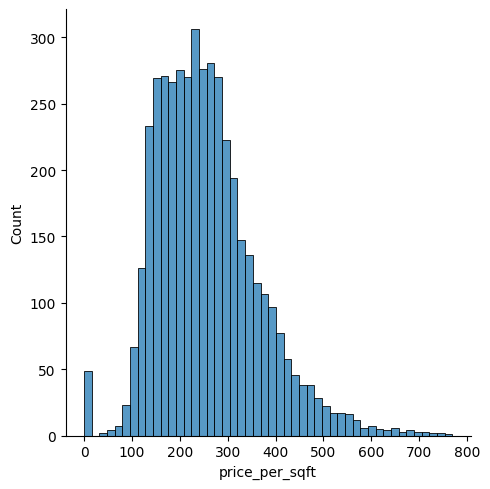

In [ ]:
sns.displot(housing_df['price_per_sqft'])
plt.show()

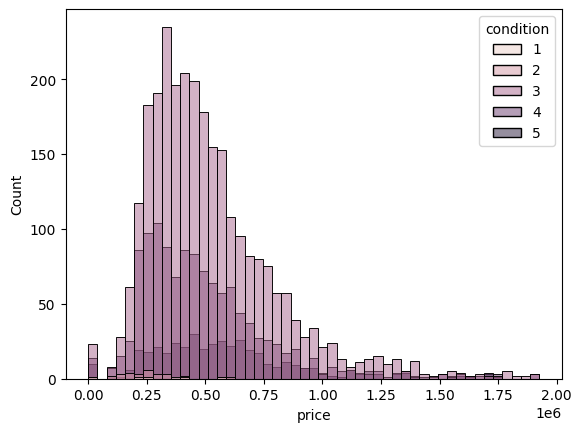

In [ ]:
sns.histplot(x = 'price', hue ='condition', data = housing_df)
plt.show()

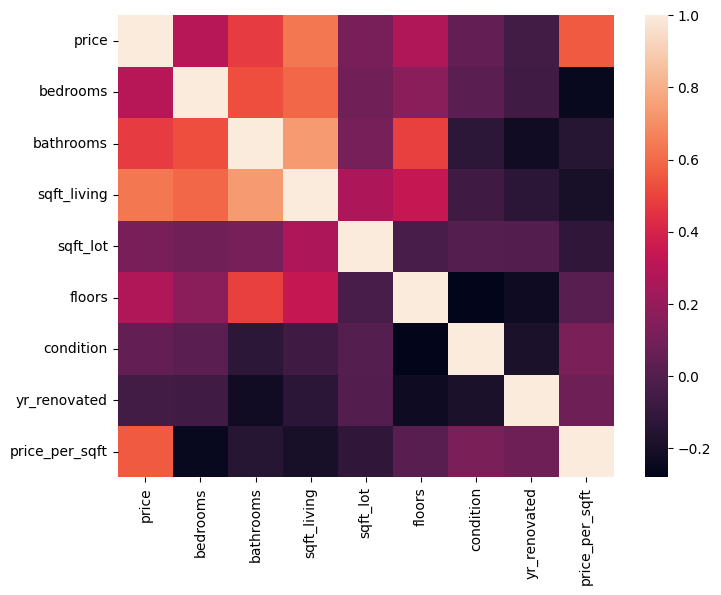

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(housing_df.corr())
plt.show()

In [148]:
numeric_columns = housing_df[['price', 'sqft_lot', 'sqft_living', 'yr_renovated', 'floors', 'price_per_sqft']]

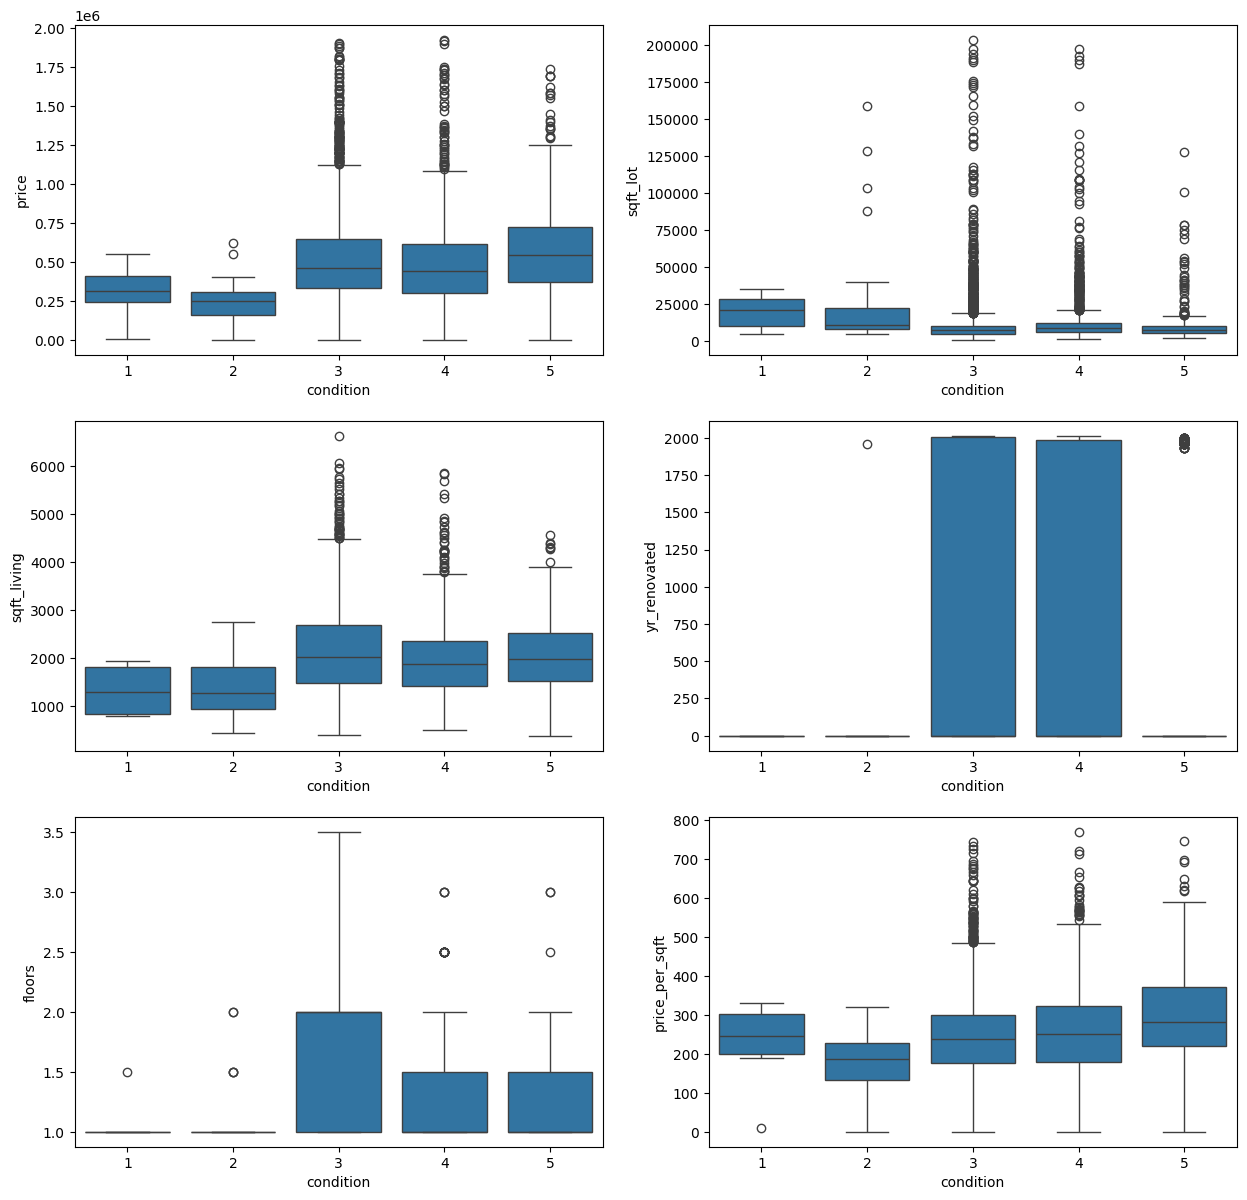

In [150]:
plt.figure(figsize=(15,30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(6,2, i + 1)
    sns.boxplot(y=numeric_columns.columns[i], x='condition', data = housing_df)
plt.show()

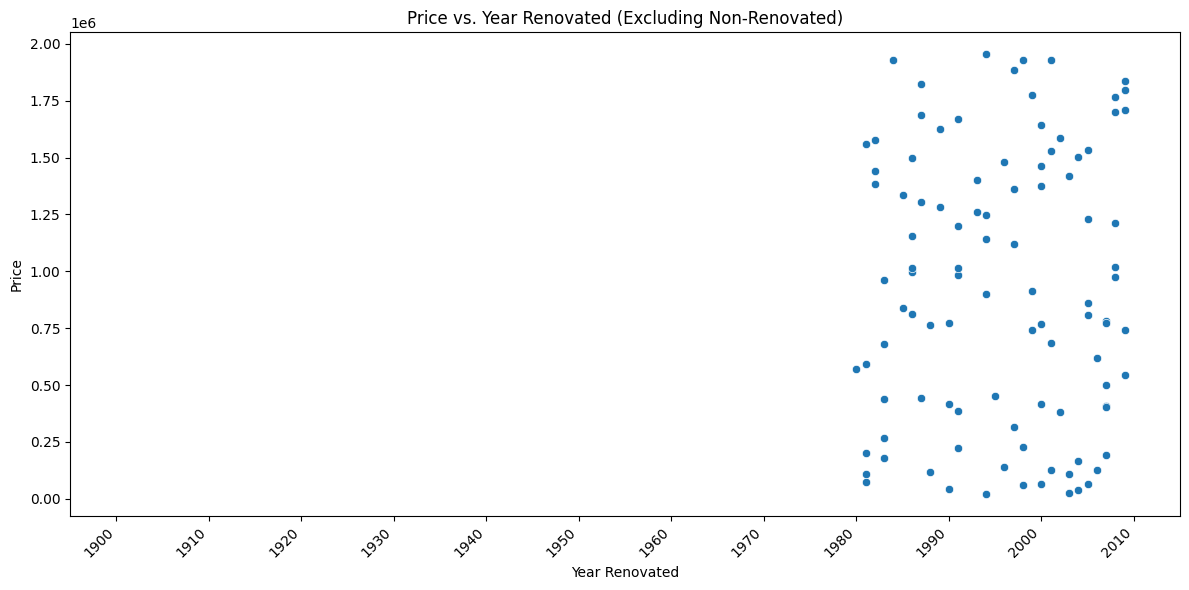

In [ ]:
np.random.seed(42)
n_samples = 200
years_not_renovated = np.zeros(n_samples // 2)
years_renovated = np.random.randint(1980, 2010, size=n_samples // 2)
prices_not_renovated = np.random.randint(0, 2000000, size=n_samples // 2)
prices_renovated = np.random.randint(0, 2000000, size=n_samples // 2)

df = housing_df.copy()

df = pd.DataFrame({
    'yr_renovated': np.concatenate([years_not_renovated, years_renovated]),
    'price': np.concatenate([prices_not_renovated, prices_renovated])
})

# Filter out rows where 'yr_renovated' is 0
df_renovated = df[df['yr_renovated'] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='yr_renovated', y='price', data=df_renovated)
plt.title('Price vs. Year Renovated (Excluding Non-Renovated)')
plt.xlabel('Year Renovated')
plt.ylabel('Price')

# Set the x-axis ticks for the renovated years
plt.xticks(np.arange(1900, 2011, 10), rotation=45, ha='right')

# Adjust x-axis limits to fit the renovated years more closely
plt.xlim(1895, 2015)

plt.tight_layout()
plt.show()

In [146]:
import pandas as pd

correlation_data = housing_df

# Calculate Pearson's correlation matrix
pearson_corr_matrix = correlation_data.corr(method='pearson')
print("Pearson's Correlation Matrix:\n", pearson_corr_matrix)

# Calculate Spearman's rank correlation matrix
spearman_corr_matrix = correlation_data.corr(method='spearman')
print("\nSpearman's Rank Correlation Matrix:\n", spearman_corr_matrix)

Pearson's Correlation Matrix:
                    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price           1.000000  0.298431   0.478164     0.637400  0.111321   
bedrooms        0.298431  1.000000   0.527817     0.590529  0.087155   
bathrooms       0.478164  0.527817   1.000000     0.737176  0.107734   
sqft_living     0.637400  0.590529   0.737176     1.000000  0.265262   
sqft_lot        0.111321  0.087155   0.107734     0.265262  1.000000   
floors          0.270837  0.163694   0.491518     0.341988 -0.031445   
condition       0.047398  0.021516  -0.130071    -0.068355  0.002502   
yr_renovated   -0.051264 -0.062374  -0.225149    -0.130714 -0.004213   
price_per_sqft  0.555959 -0.254665  -0.148832    -0.196499 -0.117007   

                  floors  condition  yr_renovated  price_per_sqft  
price           0.270837   0.047398     -0.051264        0.555959  
bedrooms        0.163694   0.021516     -0.062374       -0.254665  
bathrooms       0.491518  -0.130071     -0.2

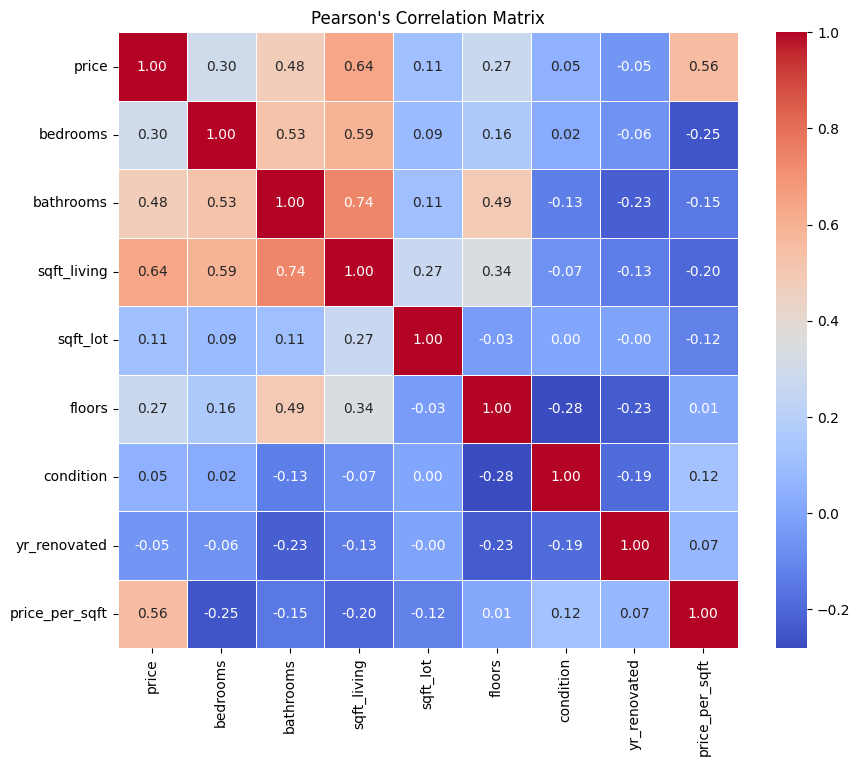

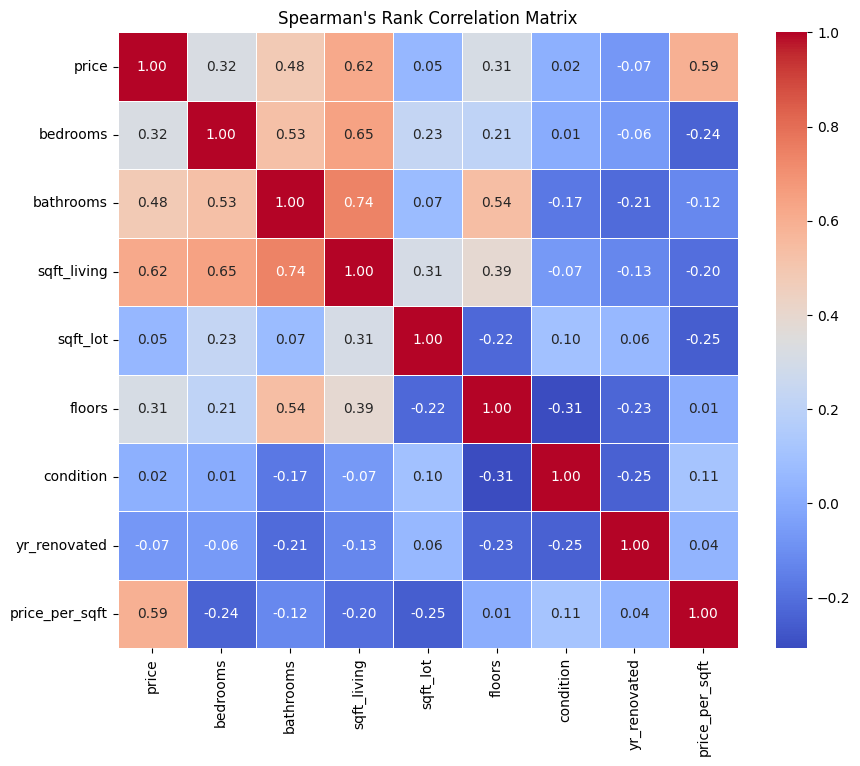

In [151]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson's Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Spearman's Rank Correlation Matrix")
plt.show()